## Exploring Biomarkers for Paper 1
    
 * __Time Dysnchrony__: over how many time frames does the peak regional reservoir strain spread?
 * __Normalised Regional Reservoir Strain wrt Global average__:
     * Each regional reservoir strain is given as percentage wrt global average 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from matplotlib.patches import Patch

from hrs_23_figures import *

In [2]:
regions = ["Global", "Post", "Septum", "Lat", "Ant", "Inf"]
regions = ['global', 'roof', 'sept', 'lat', 'ant', 'post']

regions_v2 = ['global', 'post', 'sept', 'lat', 'ant', 'inf']

In [3]:
len(nonaf_cases)

21

In [4]:
len(af_cases)

9

# Time Desynchrony

In [5]:
## Load area strains for nonAF cases

dataPath = "/home/csi20local/Data/RG_CT_Cases"
dataPath = "/home/csi20/Dropbox/phd/Data/RG_CT_Cases"

## N_strain_type, N_cases, N_regions, N_time_frames
## The below contains strain transients over 10 frames for area, fibre and cross-fibre strains (1st index)
## Each of cases (2nd ind)
## Each region (3rd ind)
## Each time frame (4th ind)
nonaf_strains = np.zeros((3, len(nonaf_cases), 6, 10))

for j in range(0, len(nonaf_cases)):
    case = nonaf_cases[j]
    
    if case in f20_cases:
        filepath = f'{dataPath}/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9'
    
    else:
        filepath = f'{dataPath}/{case}/MT-HiRes/SW-0.0-BE-1e-9'
    
    for i in range(0, len(regions)):
        region = regions[i]

#         crt01_data[i, :] = np.loadtxt(f"{dataPath}/{nonaf_cases[0]}/MT-HiRes/SW-0.0-BE-1e-9/area_meanstrains_{region}.txt")
        nonaf_strains[0, j, i, :] = np.loadtxt(f"{filepath}/area_meanstrains_{region}_excl_PVs.txt")
        nonaf_strains[1, j, i, :] = np.loadtxt(f"{filepath}/percent_regional_strains/endo_avg_excl_PVs_percent_meanstrains_{region}.txt")[0]
        nonaf_strains[2, j, i, :] = np.loadtxt(f"{filepath}/percent_regional_strains/endo_avg_excl_PVs_percent_meanstrains_{region}.txt")[1]
        

In [6]:
## Load area strains for AF cases

dataPath = "/home/csi20local/Data/RG_CT_Cases"
dataPath = "/home/csi20/Dropbox/phd/Data/RG_CT_Cases"

af_strains = np.zeros((3, len(af_cases), 6, 10))

for j in range(0, len(af_cases)):
    case = af_cases[j]
    
    if case in f20_cases:
        filepath = f'{dataPath}/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9'
    
    else:
        filepath = f'{dataPath}/{case}/MT-HiRes/SW-0.0-BE-1e-9'
    
    for i in range(0, len(regions)):
        region = regions[i]
        
        af_strains[0, j, i, :] = np.loadtxt(f"{filepath}/area_meanstrains_{region}.txt")
        af_strains[1, j, i, :] = np.loadtxt(f"{filepath}/percent_regional_strains/endo_avg_excl_PVs_percent_meanstrains_{region}.txt")[0]
        af_strains[2, j, i, :] = np.loadtxt(f"{filepath}/percent_regional_strains/endo_avg_excl_PVs_percent_meanstrains_{region}.txt")[1]
        

In [7]:
nonaf_strains.shape

(3, 21, 6, 10)

## Correcting: Conversion to Linear Strain

In [8]:
nonaf_strains[1:, :, :, :] = (np.sqrt(2*nonaf_strains[1:, :, :, :]/100.0+1)-1)*100
af_strains[1:, :, :, :] = (np.sqrt(2*af_strains[1:, :, :, :]/100.0+1)-1)*100

In [9]:
## the below gives delta T
t_dys_nonaf = nonaf_strains[:, :, 1:, :].argmax(axis=3).ptp(axis=2)
t_dys_nonaf

array([[2, 2, 0, 3, 1, 1, 4, 3, 5, 2, 1, 4, 0, 2, 4, 1, 1, 3, 1, 6, 3],
       [3, 0, 1, 3, 2, 1, 3, 2, 7, 2, 1, 3, 2, 2, 3, 1, 1, 4, 2, 4, 3],
       [2, 2, 1, 2, 1, 1, 1, 5, 6, 1, 1, 4, 0, 2, 4, 1, 1, 2, 1, 2, 2]])

In [10]:
## the below gives delta T
t_dys_af = af_strains[:, :, 1:, :].argmax(axis=3).ptp(axis=2)
t_dys_af

array([[1, 4, 2, 6, 5, 3, 5, 4, 1],
       [6, 4, 3, 4, 5, 2, 6, 2, 2],
       [2, 1, 3, 4, 5, 3, 5, 7, 2]])

In [11]:
## Testing for statistical significance for each of three strain metrics DELTA T

result_area = stats.ttest_ind(t_dys_af[0, :], t_dys_nonaf[0, :])
result_f1 = stats.ttest_ind(t_dys_af[1, :], t_dys_nonaf[1, :])
result_f2 = stats.ttest_ind(t_dys_af[2, :], t_dys_nonaf[2, :])

print("Area strain: ", result_area)
print("f1 strain: ", result_f1)
print("f2 strain: ", result_f2)

Area strain:  Ttest_indResult(statistic=1.6614943214713949, pvalue=0.10777205004185687)
f1 strain:  Ttest_indResult(statistic=2.27486001037993, pvalue=0.030770173135445965)
f2 strain:  Ttest_indResult(statistic=2.3981030427387418, pvalue=0.023389135593950686)


In [40]:
print("non-AF mean: ", t_dys_nonaf[0, :].mean())
print("non-AF std: ", t_dys_nonaf[0, :].std())

non-AF mean:  2.3333333333333335
non-AF std:  1.5836465855538944


In [46]:
print("area delta T")
print("non-AF mean: ", np.mean(t_dys_nonaf[0, :]), "pm", np.std(t_dys_nonaf[0, :]))
print("AF mean: ", np.mean(t_dys_af[0, :]), "pm", np.std(t_dys_af[0, :]))

print("\nf1 delta T")
print("non-AF mean: ", np.mean(t_dys_nonaf[1, :]), "pm", np.std(t_dys_nonaf[1, :]))
print("AF mean: ", np.mean(t_dys_af[1, :]), "pm", np.std(t_dys_af[1, :]))

print("\nf2 delta T")
print("non-AF mean: ", np.mean(t_dys_nonaf[2, :]))
print("AF mean: ", np.mean(t_dys_af[2, :]))

area delta T
non-AF mean:  2.3333333333333335 pm 1.5836465855538944
AF mean:  3.4444444444444446 pm 1.7069212773041351

f1 delta T
non-AF mean:  2.380952380952381 pm 1.4630753805464016
AF mean:  3.7777777777777777 pm 1.547598697464902

f2 delta T
non-AF mean:  2.0
AF mean:  3.5555555555555554


In [14]:
print("AF mean: ", t_dys_af[2, :].mean())
print("AF std: ", t_dys_af[2, :].std())

AF mean:  3.5555555555555554
AF std:  1.7708197167232476


In [15]:
nonaf_strains.shape

(3, 21, 6, 10)

In [16]:
nonaf_cases[4]

'CT-CRT/case08'

In [17]:
nonaf_strains[0, 4, 2, :]

array([ 0.        ,  6.10730742, 10.07851088, 19.66921691, 23.02127123,
       20.37930206, 12.63586282,  9.32038143,  1.22173042, -1.02490614])

In [18]:
regions

['global', 'roof', 'sept', 'lat', 'ant', 'post']

In [19]:
regions_v2

['global', 'post', 'sept', 'lat', 'ant', 'inf']

In [36]:
np.arange(0, 11, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

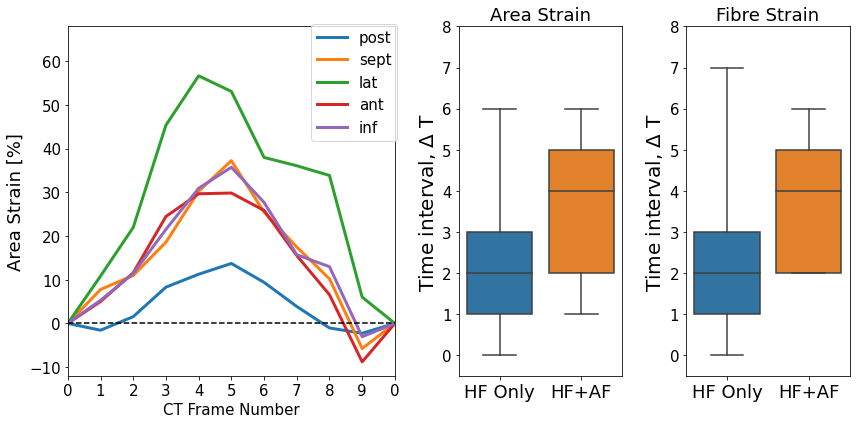

In [39]:
# ## Plot showing:
# a) Sample strain transient
# b) Copmarisons of DELTA T for all strain metrics

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6), gridspec_kw={'width_ratios': [2, 1, 1]})

case_ind = 10
for i in range(0, len(regions)-1):
    y = list(nonaf_strains[0, case_ind, i+1, :])
    y.append(0)
    ax1.plot(np.arange(0, 1.1, 0.1), y, lw=3, label=regions_v2[i+1])
    
ax1.tick_params(axis='both', labelsize=15)
ax1.set_ylim(-12, 68)
ax1.set_xlim(0, 1)
ax1_xlabels = list(np.arange(0, 10, 1))
ax1_xlabels += [0]
ax1.set_xticks(np.arange(0, 1.1, 0.1), labels=ax1_xlabels)
ax1.legend(fontsize=15, bbox_to_anchor=(0.72, .65))
ax1.set_xlabel("CT Frame Number", fontsize=15)
ax1.set_ylabel("Area Strain [%]", fontsize=18)
ax1.plot(np.arange(0, 1.1, 0.1), [0]*11, ls='--', c='black')


sns.boxplot(data=[t_dys_nonaf[0,:]/10., t_dys_af[0,:]/10.], ax=ax2, whis=(0,100))
sns.boxplot(data=[t_dys_nonaf[1,:]/10., t_dys_af[1,:]/10.], ax=ax3, whis=(0,100))
# sns.boxplot(data=[t_dys_nonaf[2,:]/10., t_dys_af[2,:]/10.], ax=ax4)


ax2.set_xticks(np.arange(2))
ax2.set_yticks(np.arange(0, 0.9, 0.1), labels=np.arange(0, 9, 1))
ax3.set_yticks(np.arange(0, 0.9, 0.1), labels=np.arange(0, 9, 1))

ax2.set_ylim(-0.05, 0.8)
ax3.set_ylim(-0.05, 0.8)
# ax4.set_ylim(-0.05, 0.8)


ax2.set_title("Area Strain", fontsize=18)
ax3.set_title("Fibre Strain", fontsize=18)
# ax4.set_title("Cross-Fibre Strain", fontsize=18)

for i in range(1, len(fig.axes)):
    fig.axes[i].tick_params(axis='both', labelsize=15)
    fig.axes[i].set_xticklabels(["HF Only", "HF+AF"], fontsize=18)
    fig.axes[i].set_ylabel("Time interval, $\Delta$ T", fontsize=20)

plt.tight_layout()

# ax2.set_yticks(np.arange(0.0, 1.0, 0.2))
# ax3.set_yticks(np.arange(0.0, 1.0, 0.2))

# plt.savefig("/home/csi20/Dropbox/phd/Documents/P1/EHJ_CI/delta_t_v3.png", dpi=200, bbox_inches="tight")

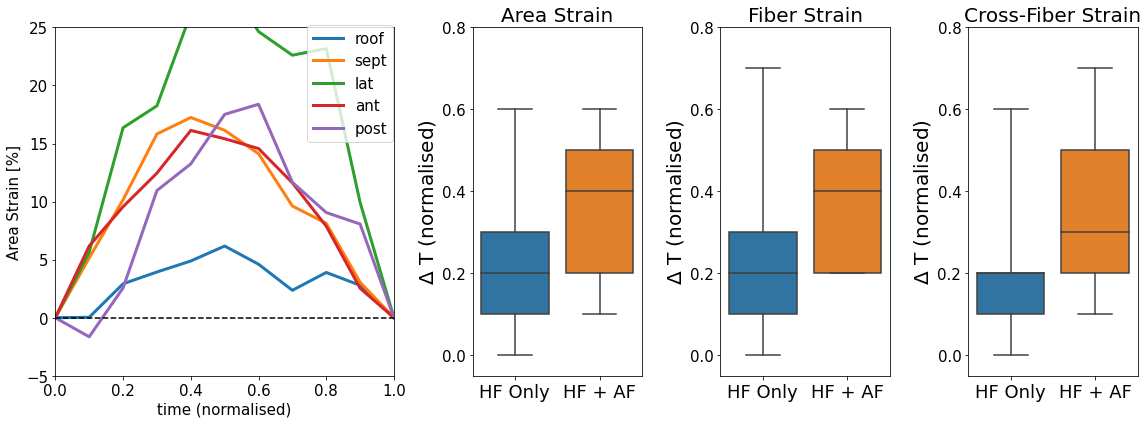

In [21]:
# ## Plot showing:
# a) Sample strain transient
# b) Copmarisons of DELTA T for all strain metrics

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(16,6), gridspec_kw={'width_ratios': [2, 1, 1, 1]})

case_ind = 0
for i in range(0, len(regions)-1):
    y = list(nonaf_strains[0, case_ind, i+1, :])
    y.append(0)
    ax1.plot(np.arange(0, 1.1, 0.1), y, lw=3, label=regions[i+1])
    
ax1.tick_params(axis='both', labelsize=15)
ax1.set_ylim(-5, 25)
ax1.set_xlim(0, 1)
ax1.legend(fontsize=15, bbox_to_anchor=(0.72, .65))
ax1.set_xlabel("time (normalised)", fontsize=15)
ax1.set_ylabel("Area Strain [%]", fontsize=15)
ax1.plot(np.arange(0, 1.1, 0.1), [0]*11, ls='--', c='black')


sns.boxplot(data=[t_dys_nonaf[0,:]/10., t_dys_af[0,:]/10.], ax=ax2, whis=(0, 100))
sns.boxplot(data=[t_dys_nonaf[1,:]/10., t_dys_af[1,:]/10.], ax=ax3, whis=(0, 100))
sns.boxplot(data=[t_dys_nonaf[2,:]/10., t_dys_af[2,:]/10.], ax=ax4, whis=(0, 100))


ax2.set_xticks(np.arange(2))
ax2.set_yticks(np.arange(0, 0.9, 0.1))
ax2.set_ylim(-0.05, 0.8)
ax3.set_ylim(-0.05, 0.8)
ax4.set_ylim(-0.05, 0.8)


ax2.set_title("Area Strain", fontsize=20)
ax3.set_title("Fiber Strain", fontsize=20)
ax4.set_title("Cross-Fiber Strain", fontsize=20)

for i in range(1, len(fig.axes)):
    fig.axes[i].tick_params(axis='both', labelsize=15)
    fig.axes[i].set_xticklabels(["HF Only", "HF + AF"], fontsize=18)
    fig.axes[i].set_ylabel("$\Delta$ T (normalised)", fontsize=20)

plt.tight_layout()

ax2.set_yticks(np.arange(0.0, 1.0, 0.2))
ax3.set_yticks(np.arange(0.0, 1.0, 0.2))
ax4.set_yticks(np.arange(0.0, 1.0, 0.2))

# plt.savefig("/home/csi20local/Dropbox/phd/Documents/P1/t_dysnch_SAN_fullwhis.png", dpi=200, bbox_inches="tight")

In [22]:
np.round(stats.ttest_ind(t_dys_nonaf[2,:], t_dys_af[2,:]), 3)

array([-2.398,  0.023])

In [23]:
nonaf_strains.shape

(3, 21, 6, 10)

In [24]:
nonaf_strains[0, 0, :, :]

array([[ 0.        ,  2.43866319,  6.67010677, 10.92079647, 13.40218501,
        14.60881926, 13.54566482,  9.59508281,  8.17225184,  4.54483638],
       [ 0.        ,  0.03779326,  2.92194213,  3.93753198,  4.88556962,
         6.17376922,  4.60801479,  2.36147716,  3.89725913,  2.79396154],
       [ 0.        ,  5.14179176, 10.15703371, 15.82136043, 17.2419928 ,
        16.14404067, 14.12424345,  9.61993969,  8.12895687,  3.05635332],
       [ 0.        ,  5.63432275, 16.35818841, 18.24560051, 26.18896955,
        29.34630524, 24.64175692, 22.6057575 , 23.17521302,  9.92600033],
       [ 0.        ,  6.17755288,  9.55673727, 12.45182677, 16.12806142,
        15.41243569, 14.5700039 , 11.61620483,  7.87872763,  2.53526839],
       [ 0.        , -1.64265173,  2.56591222, 10.95273128, 13.24746015,
        17.51094623, 18.38101152, 11.66153225,  9.05794666,  8.06616072]])

## Correcting Fig 1: Overview Fig for P1

In [25]:
nonaf_strains.shape

(3, 21, 6, 10)

In [26]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


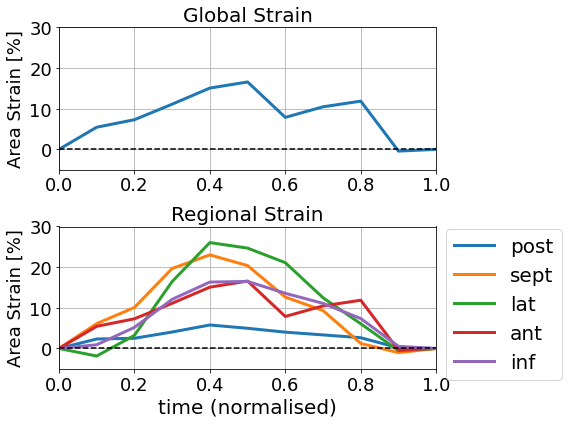

In [27]:
case_ind = 4

fig, ((ax1), (ax2)) = plt.subplots(2,1, figsize=(8,6))


y = list(nonaf_strains[0, case_ind, i+1, :])
y.append(0)
ax1.plot(np.arange(0, 1.1, 0.1), y, lw=3)

for i in range(0, len(regions)-1):
    y = list(nonaf_strains[0, case_ind, i+1, :])
    y.append(0)
    ax2.plot(np.arange(0, 1.1, 0.1), y, lw=3, label=regions_v2[i+1])
    
ax2.legend(fontsize=20, bbox_to_anchor=(1.0, 1.05))
ax2.set_xlabel("time (normalised)", fontsize=20)

ax1.set_xlim(-0.0, 1.0)
ax2.set_xlim(-0.0, 1.0)
ax1.set_ylim(-5, 30)
ax2.set_ylim(-5, 30)

colors_list=["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]


for i in range(0, len(fig.axes)):
    fig.axes[i].tick_params(axis='both', labelsize=18)
    fig.axes[i].plot(np.arange(0, 1.1, 0.1), [0]*11, ls='--', c='black')
    fig.axes[i].set_ylabel("Area Strain [%]", fontsize=18)
    fig.axes[i].set_yticks(np.arange(0,40,10))

ax1.grid()
ax2.grid()

ax1.set_title("Global Strain", fontsize=20)
ax2.set_title("Regional Strain", fontsize=20)

plt.tight_layout()


# plt.savefig("/home/csi20/Dropbox/phd/Documents/P1/EHJ_CI/Overview_correction/strain_curves.png", dpi=200, bbox_inches="tight")

## Graphical Abstract Correctin Strain Curve

In [39]:
nonaf_strains.shape

(3, 21, 6, 10)

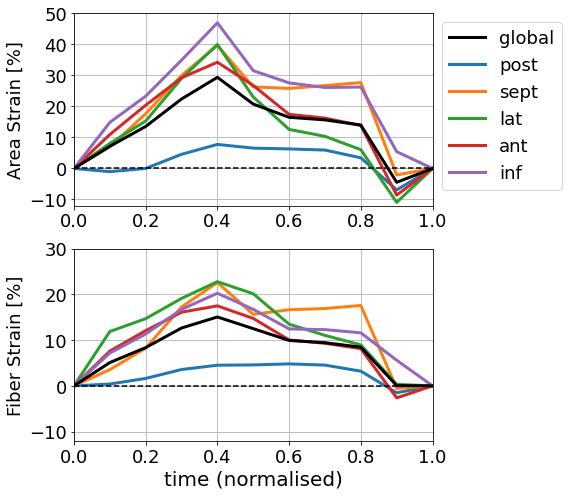

In [102]:
case_ind = 12

fig, ((ax1), (ax2)) = plt.subplots(2,1, figsize=(8,7))

## Area strain plot

## Plot global strain
y = list(nonaf_strains[0, case_ind, 0, :])
y.append(0)
ax1.plot(np.arange(0, 1.1, 0.1), y, lw=3, color='black', zorder=10, label=regions_v2[0])

for i in range(1, len(regions)):
    y = list(nonaf_strains[0, case_ind, i, :])
    y.append(0)
    ax1.plot(np.arange(0, 1.1, 0.1), y, lw=3, label=regions_v2[i])

## Fibre strain plot
    
## Plot global strain
y = list(nonaf_strains[1, case_ind, 0, :])
y.append(0)
ax2.plot(np.arange(0, 1.1, 0.1), y, lw=3, color='black', zorder=10, label=regions_v2[0])

for i in range(1, len(regions)):
    y = list(nonaf_strains[1, case_ind, i, :])
    y.append(0)
    ax2.plot(np.arange(0, 1.1, 0.1), y, lw=3, label=regions_v2[i])
    

ax2.set_xlabel("time (normalised)", fontsize=20)

ax1.legend(fontsize=18, bbox_to_anchor=(1.0, 1.0))


colors_list=["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]


for i in range(0, len(fig.axes)):
    fig.axes[i].tick_params(axis='both', labelsize=18)
    fig.axes[i].plot(np.arange(0, 1.1, 0.1), [0]*11, ls='--', c='black')
    fig.axes[i].set_yticks(np.arange(-10,60,10))



ax1.set_ylabel("Area Strain [%]", fontsize=18)
ax2.set_ylabel("Fiber Strain [%]", fontsize=18)

ax1.set_xlim(-0.0, 1.0)
ax2.set_xlim(-0.0, 1.0)
ax1.set_ylim(-12, 50)
ax2.set_ylim(-12, 30)

ax1.grid()
ax2.grid()

plt.tight_layout()


# plt.savefig("/home/csi20/Dropbox/phd/Documents/P1/EHJ_CI/graph_abs_strain_curves.png", dpi=200, bbox_inches="tight")

## Which regions peak latest?

In [38]:
## region_max_strain_time shows:
## Each row: a new case
## Each col: region
## Values: time frame for which each region has maximal strain (i.e. when reservoir strain peaks)

region_max_strain_time = np.argmax(nonaf_strains[0, :, :, :], axis=2)

max_strain_time_percase = region_max_strain_time.max(axis=1)

for i in range(0, len(nonaf_cases)):
    case=nonaf_cases[i]
    
    condition = region_max_strain_time[i, :] == max_strain_time_percase[i]
    latest_regions_v2 = [regions_v2[i] for i, val in enumerate(condition) if val]
    
    ## Remove global if is one of the latest peak strians
    if "global" in latest_regions_v2:
        latest_regions_v2.remove("global")
    
    ## Only print out cases which have a single region as latest peak
    if len(latest_regions_v2) == 1:
        print(case, latest_regions_v2)

CT-CRT/case02 ['inf']
CT-CRT/case05 ['post']
CT-CRT/case07 ['lat']
CT-CRT/case10 ['post']
CT-CRT/case12 ['ant']
CT-CRT/case14 ['post']
CT-CRT/case17 ['lat']
CT-CRT/case29 ['sept']
CT-CRT/case34 ['lat']
EBR/case05 ['sept']
EBR/case06 ['lat']


In [39]:
## AF cases

region_max_strain_time = np.argmax(af_strains[0, :, :, :], axis=2)

max_strain_time_percase = region_max_strain_time.max(axis=1)

for i in range(0, len(af_cases)):
    case=af_cases[i]
    
    condition = region_max_strain_time[i, :] == max_strain_time_percase[i]
    latest_regions_v2 = [regions_v2[i] for i, val in enumerate(condition) if val]
    
    ## Remove global if is one of the latest peak strians
    if "global" in latest_regions_v2:
        latest_regions_v2.remove("global")
    
    ## Only print out cases which have a single region as latest peak
    if len(latest_regions_v2) == 1:
        print(case, latest_regions_v2)

CT-CRT/case19 ['inf']
CT-CRT/case20 ['lat']
CT-CRT/case23 ['lat']
CT-CRT/case26 ['inf']
EBR/case02 ['sept']


In [40]:
nonaf_strains.shape

(3, 21, 6, 10)

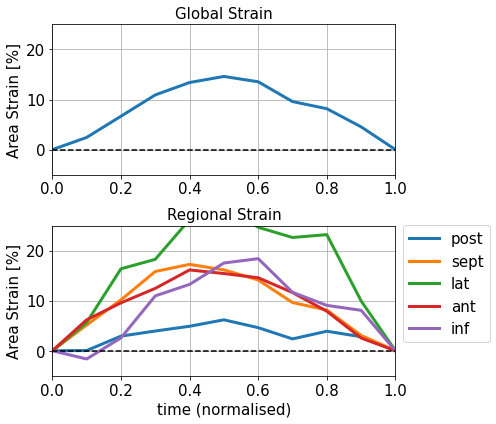

In [42]:
## Strain curve for Gordon slides

fig, ((ax1), (ax2)) = plt.subplots(2,1, figsize=(7,6))

case_ind = 0

## Plot Global strain transient
y = list(nonaf_strains[0, case_ind, 0, :])
y.append(0)
ax1.plot(np.arange(0, 1.1, 0.1), y, lw=3)

## Plot regional transients
for i in range(0, len(regions)-1):
    y = list(nonaf_strains[0, case_ind, i+1, :])
    y.append(0)
    ax2.plot(np.arange(0, 1.1, 0.1), y, lw=3, label=regions_v2[i+1])
    
ax2.legend(fontsize=15, bbox_to_anchor=(1.0, 1.05))
ax2.set_xlabel("time (normalised)", fontsize=15)

ax1.set_xlim(-0.0, 1.0)
ax2.set_xlim(-0.0, 1.0)
ax1.set_ylim(-5, 25)
ax2.set_ylim(-5, 25)

for i in range(0, len(fig.axes)):
    fig.axes[i].tick_params(axis='both', labelsize=15)
    fig.axes[i].plot(np.arange(0, 1.1, 0.1), [0]*11, ls='--', c='black')
    fig.axes[i].set_ylabel("Area Strain [%]", fontsize=15)

ax1.grid()
ax2.grid()

ax1.set_title("Global Strain", fontsize=15)
ax2.set_title("Regional Strain", fontsize=15)

plt.tight_layout()


# plt.savefig("/home/csi20/Dropbox/phd/Documents/GOLDEN_slides/strain_curves_crt02_2.png", dpi=200, bbox_inches="tight")

## Normlaised Reservoir Strain

We've already seen that globally and regionally, AF cases have reduced strains.
However, when normalising with respect to average global strain, do AF cases have reduced regional strains?

In [43]:
non_af_ranges = nonaf_strains.ptp(axis=3)
af_ranges = af_strains.ptp(axis=3)

In [44]:
non_af_ranges[0, 0, :]/non_af_ranges[0, 0, 0] - 1

array([ 0.        , -0.57739437,  0.18024547,  1.00880747,  0.10399486,
        0.37065583])

In [45]:
## N_strain_metric, N_case, N_regions
res_strain_norm_nonaf = np.zeros((3, len(nonaf_cases), 6))

for i in range(0, len(nonaf_cases)):
    ans = non_af_ranges[0, i, :]/non_af_ranges[0, i, 0] - 1    
    res_strain_norm_nonaf[0, i, :] = ans
    
for i in range(0, len(nonaf_cases)):
    ans = non_af_ranges[1, i, :]/non_af_ranges[1, i, 0] - 1    
    res_strain_norm_nonaf[1, i, :] = ans
    
for i in range(0, len(nonaf_cases)):
    ans = non_af_ranges[2, i, :]/non_af_ranges[2, i, 0] - 1    
    res_strain_norm_nonaf[2, i, :] = ans

In [46]:
res_strain_norm_af = np.zeros((3, len(af_cases), 6))

for i in range(0, len(af_cases)):
    ans = af_ranges[0, i, :]/af_ranges[0, i, 0] - 1
    res_strain_norm_af[0, i, :] = ans
    
for i in range(0, len(af_cases)):
    ans = af_ranges[1, i, :]/af_ranges[1, i, 0] - 1
    res_strain_norm_af[1, i, :] = ans
    
for i in range(0, len(af_cases)):
    ans = af_ranges[2, i, :]/af_ranges[2, i, 0] - 1
    res_strain_norm_af[2, i, :] = ans

In [47]:
res_strain_norm_nonaf.shape

(3, 21, 6)

<AxesSubplot:>

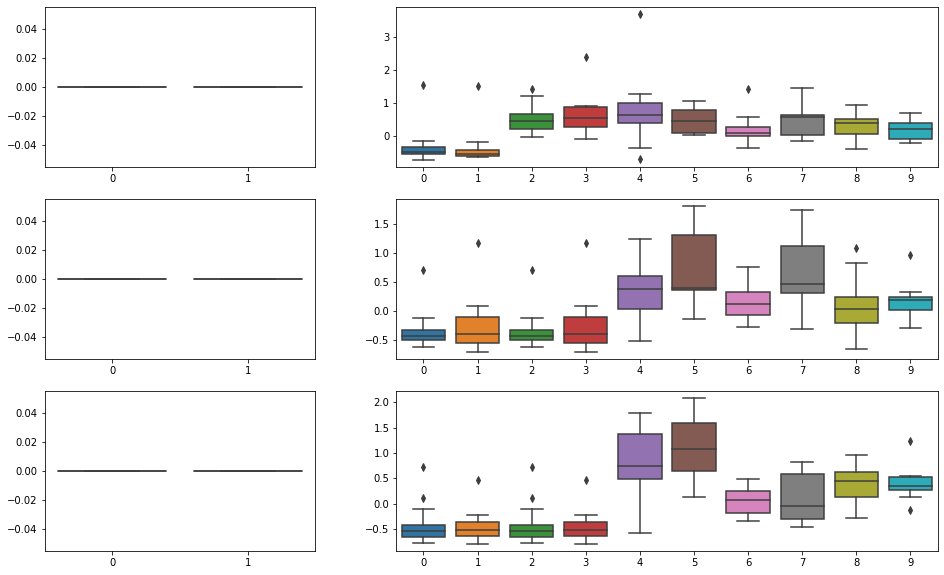

In [48]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(16,10), gridspec_kw={'width_ratios': [1, 2]})

strain_metric_ind=0
sns.boxplot(data=[res_strain_norm_nonaf[strain_metric_ind, :, 0], res_strain_norm_af[strain_metric_ind, :, 0]], ax=ax1)
sns.boxplot(data=[res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 2], res_strain_norm_af[strain_metric_ind, :, 2],
                 res_strain_norm_nonaf[strain_metric_ind, :, 3], res_strain_norm_af[strain_metric_ind, :, 3],
                 res_strain_norm_nonaf[strain_metric_ind, :, 4], res_strain_norm_af[strain_metric_ind, :, 4],
                 res_strain_norm_nonaf[strain_metric_ind, :, 5], res_strain_norm_af[strain_metric_ind, :, 5]], ax=ax2)

strain_metric_ind=1
sns.boxplot(data=[res_strain_norm_nonaf[strain_metric_ind, :, 0], res_strain_norm_af[strain_metric_ind, :, 0]], ax=ax3)
sns.boxplot(data=[res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 3], res_strain_norm_af[strain_metric_ind, :, 3],
                 res_strain_norm_nonaf[strain_metric_ind, :, 4], res_strain_norm_af[strain_metric_ind, :, 4],
                 res_strain_norm_nonaf[strain_metric_ind, :, 5], res_strain_norm_af[strain_metric_ind, :, 5]], ax=ax4)

strain_metric_ind=2
sns.boxplot(data=[res_strain_norm_nonaf[strain_metric_ind, :, 0], res_strain_norm_af[strain_metric_ind, :, 0]], ax=ax5)
sns.boxplot(data=[res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 3], res_strain_norm_af[strain_metric_ind, :, 3],
                 res_strain_norm_nonaf[strain_metric_ind, :, 4], res_strain_norm_af[strain_metric_ind, :, 4],
                 res_strain_norm_nonaf[strain_metric_ind, :, 5], res_strain_norm_af[strain_metric_ind, :, 5]], ax=ax6)

AxesSubplot(0.125,0.657941;0.775x0.222059)


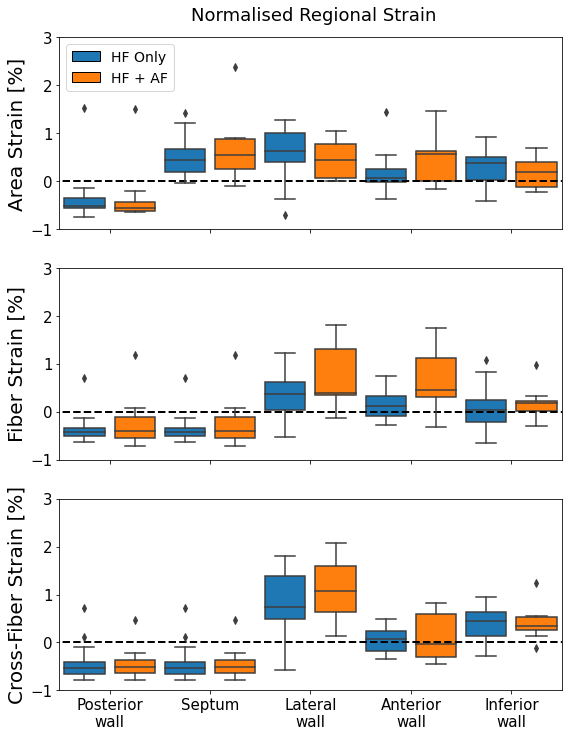

In [49]:
fig, ((ax1, ax2, ax3)) = plt.subplots(3,1, figsize=(8,10), facecolor='white')

for i in range(0, len(fig.axes)):
    fig.axes[i].plot(np.arange(-2,11,1), [0.0]*13, ls='--', c='black', lw=2)

strain_metric_ind=0
data_to_plot = [res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 2], res_strain_norm_af[strain_metric_ind, :, 2],
                 res_strain_norm_nonaf[strain_metric_ind, :, 3], res_strain_norm_af[strain_metric_ind, :, 3],
                 res_strain_norm_nonaf[strain_metric_ind, :, 4], res_strain_norm_af[strain_metric_ind, :, 4],
                 res_strain_norm_nonaf[strain_metric_ind, :, 5], res_strain_norm_af[strain_metric_ind, :, 5]]
box1 = sns.boxplot(data=data_to_plot, ax=ax1)

strain_metric_ind=1
sns.boxplot(data=[res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 3], res_strain_norm_af[strain_metric_ind, :, 3],
                 res_strain_norm_nonaf[strain_metric_ind, :, 4], res_strain_norm_af[strain_metric_ind, :, 4],
                 res_strain_norm_nonaf[strain_metric_ind, :, 5], res_strain_norm_af[strain_metric_ind, :, 5]],
            ax=ax2)

strain_metric_ind=2
sns.boxplot(data=[res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 3], res_strain_norm_af[strain_metric_ind, :, 3],
                 res_strain_norm_nonaf[strain_metric_ind, :, 4], res_strain_norm_af[strain_metric_ind, :, 4],
                 res_strain_norm_nonaf[strain_metric_ind, :, 5], res_strain_norm_af[strain_metric_ind, :, 5]],
            ax=ax3)

print(fig.axes[0])

for j in range(0, len(fig.axes)):
    
    for i in range(0, 10, 2):
        mybox = fig.axes[j].patches[i]
        mybox.set_facecolor('tab:blue')

    for i in range(1, 11, 2):
        mybox = fig.axes[j].patches[i]
        mybox.set_facecolor('tab:orange')

regions_axis=['Posterior\nwall', 'Septum', 'Lateral\nwall', 'Anterior\nwall', 'Inferior\nwall']

ax1.set_ylabel("Area Strain [%]", fontsize=20)
ax2.set_ylabel("Fiber Strain [%]", fontsize=20)
ax3.set_ylabel("Cross-Fiber Strain [%]", fontsize=20)

# print(box1.patches[0])
# plt.setp(box1["boxes"], facecolor=c2)

for i in range(0, len(fig.axes)):
    fig.axes[i].tick_params(axis='both', labelsize=15)
    fig.axes[i].set_xticks(np.arange(0.5, 10.5, 2))
    fig.axes[i].set_xticklabels(regions_axis[:])
    fig.axes[i].set_ylim(-1.0, 3.0)
    fig.axes[i].set_xlim(-0.5, 9.5)
#     fig.axes[i].plot(np.arange(-2,11,1), [0.0]*13, ls='--', c='black', lw=2)
    
# fig.text(0.5, 0.08, "Region", 
#          ha='center', fontsize=18)

fig.text(0.55, 1.0, "Normalised Regional Strain", 
         ha='center', fontsize=18)

legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                         label='HF Only'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='HF + AF')]
ax1.legend(handles=legend_elements, loc='upper left', fontsize=14)

for i in [0, 1]:
#     fig.axes[i].xaxis.set_ticks_position('none') 
    fig.axes[i].set_xticklabels([" ", " ", " ", " ", " "])

plt.tight_layout()
    
# plt.savefig("/home/csi20local/Dropbox/phd/Documents/P1/normalised_regional_strain_SAN.png", dpi=200, bbox_inches="tight")

AxesSubplot(0.125,0.657941;0.775x0.222059)


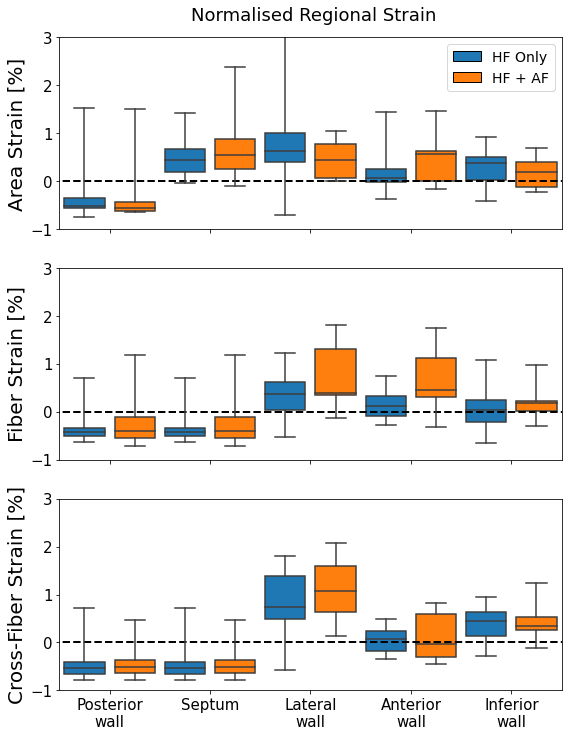

In [50]:
fig, ((ax1, ax2, ax3)) = plt.subplots(3,1, figsize=(8,10), facecolor='white')

for i in range(0, len(fig.axes)):
    fig.axes[i].plot(np.arange(-2,11,1), [0.0]*13, ls='--', c='black', lw=2)

strain_metric_ind=0
data_to_plot = [res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 2], res_strain_norm_af[strain_metric_ind, :, 2],
                 res_strain_norm_nonaf[strain_metric_ind, :, 3], res_strain_norm_af[strain_metric_ind, :, 3],
                 res_strain_norm_nonaf[strain_metric_ind, :, 4], res_strain_norm_af[strain_metric_ind, :, 4],
                 res_strain_norm_nonaf[strain_metric_ind, :, 5], res_strain_norm_af[strain_metric_ind, :, 5]]
box1 = sns.boxplot(data=data_to_plot, ax=ax1, whis=(0, 100))

strain_metric_ind=1
sns.boxplot(data=[res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 3], res_strain_norm_af[strain_metric_ind, :, 3],
                 res_strain_norm_nonaf[strain_metric_ind, :, 4], res_strain_norm_af[strain_metric_ind, :, 4],
                 res_strain_norm_nonaf[strain_metric_ind, :, 5], res_strain_norm_af[strain_metric_ind, :, 5]],
            ax=ax2, whis=(0, 100))

strain_metric_ind=2
sns.boxplot(data=[res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 3], res_strain_norm_af[strain_metric_ind, :, 3],
                 res_strain_norm_nonaf[strain_metric_ind, :, 4], res_strain_norm_af[strain_metric_ind, :, 4],
                 res_strain_norm_nonaf[strain_metric_ind, :, 5], res_strain_norm_af[strain_metric_ind, :, 5]],
            ax=ax3, whis=(0, 100))

print(fig.axes[0])

for j in range(0, len(fig.axes)):
    
    for i in range(0, 10, 2):
        mybox = fig.axes[j].patches[i]
        mybox.set_facecolor('tab:blue')

    for i in range(1, 11, 2):
        mybox = fig.axes[j].patches[i]
        mybox.set_facecolor('tab:orange')

regions_axis=['Posterior\nwall', 'Septum', 'Lateral\nwall', 'Anterior\nwall', 'Inferior\nwall']

ax1.set_ylabel("Area Strain [%]", fontsize=20)
ax2.set_ylabel("Fiber Strain [%]", fontsize=20)
ax3.set_ylabel("Cross-Fiber Strain [%]", fontsize=20)

# print(box1.patches[0])
# plt.setp(box1["boxes"], facecolor=c2)

for i in range(0, len(fig.axes)):
    fig.axes[i].tick_params(axis='both', labelsize=15)
    fig.axes[i].set_xticks(np.arange(0.5, 10.5, 2))
    fig.axes[i].set_xticklabels(regions_axis[:])
    fig.axes[i].set_ylim(-1.0, 3.0)
    fig.axes[i].set_xlim(-0.5, 9.5)
#     fig.axes[i].plot(np.arange(-2,11,1), [0.0]*13, ls='--', c='black', lw=2)
    
# fig.text(0.5, 0.08, "Region", 
#          ha='center', fontsize=18)

fig.text(0.55, 1.0, "Normalised Regional Strain", 
         ha='center', fontsize=18)

legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                         label='HF Only'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='HF + AF')]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=14)

for i in [0, 1]:
#     fig.axes[i].xaxis.set_ticks_position('none') 
    fig.axes[i].set_xticklabels([" ", " ", " ", " ", " "])

plt.tight_layout()
    
# plt.savefig("/home/csi20local/Dropbox/phd/Documents/P1/normalised_regional_strain_SAN_2.png", dpi=200, bbox_inches="tight")

In [51]:
strain_metric_ind=2
regino_ind = 5
np.round(stats.ttest_ind(res_strain_norm_nonaf[strain_metric_ind, :, regino_ind], res_strain_norm_af[strain_metric_ind, :, regino_ind]), 30)

array([-0.07183289,  0.94324555])

In [52]:
strain_metric_ind = 2
region_ind = 5

stats.ttest_ind(res_strain_norm_nonaf[strain_metric_ind, :, region_ind], 
                res_strain_norm_af[strain_metric_ind, :, region_ind])

Ttest_indResult(statistic=-0.07183288774885034, pvalue=0.9432455511349738)

In [53]:
stats.ttest_ind(res_strain_norm_nonaf[1, :, 1], res_strain_norm_af[1, :, 1])

Ttest_indResult(statistic=-0.9545073325272195, pvalue=0.3479954554905045)

In [54]:
strain_metric_ind=0

for i in range(0, 6):
    p_val = stats.ttest_ind(res_strain_norm_nonaf[strain_metric_ind, :, i], res_strain_norm_af[strain_metric_ind, :, i])[-1]
    
    print(f"i: {regions[i]}: ", p_val)


i: global:  nan
i: roof:  0.679876337353569
i: sept:  0.21523018445160394
i: lat:  0.41386497908104336
i: ant:  0.060768777659566856
i: post:  0.40909391797803063


Therefore, it looks like there is little difference btween AF and non-AF patients when looking at normalised regional strains. I.e. if we had patients with same given global strains, we wouldn't be able to find a discernible difference between AF and non-AF

# Fiber and Cross-Fiber Strains
## Testing deformation isotropy

In [55]:
af_ranges.shape

(3, 9, 6)

In [56]:
af_ranges[1, 0, :]

array([ 3.65757999,  1.69048056, 10.70609383,  8.44452232,  5.01480209,
        4.49517691])

Text(0.5, 0.06, 'Fiber Reservoir Strain [%]')

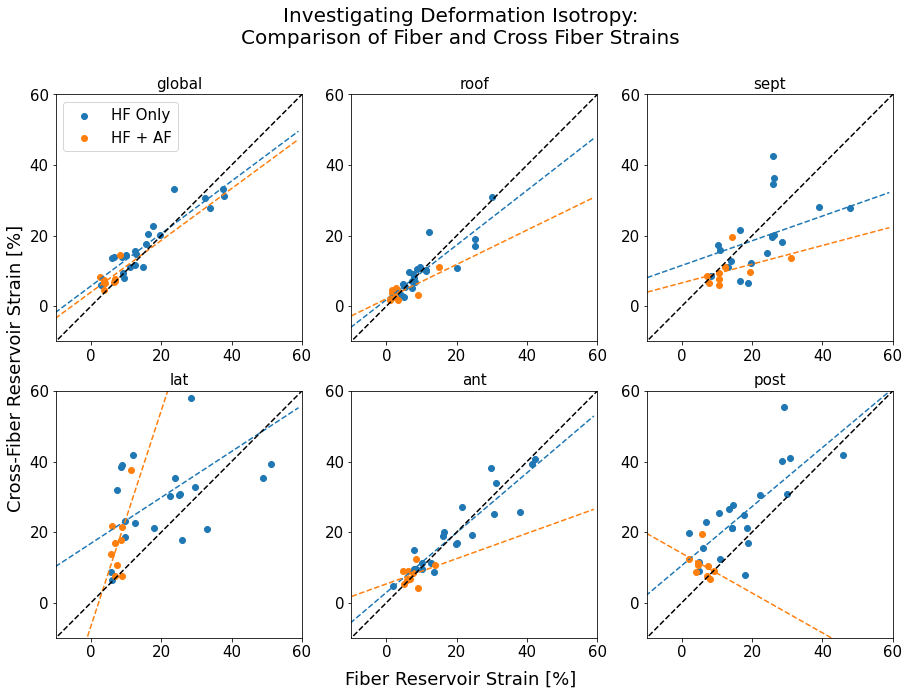

In [57]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,10))

## AF vs nAF, Region, ax + b
coeffs=np.zeros((2,6,2))

for i in range(0, len(regions)):

    ## Scatter plot data points
    fig.axes[i].scatter(non_af_ranges[1, :, i], non_af_ranges[2, :, i], label="HF Only")
    fig.axes[i].scatter(af_ranges[1, :, i], af_ranges[2, :, i], label="HF + AF")
    
    ## Fit lines of best fit
    coeffs[0, i, 0], coeffs[0, i, 1] = np.polyfit(non_af_ranges[1, :, i], non_af_ranges[2, :, i], 1)
    coeffs[1, i, 0], coeffs[1, i, 1] = np.polyfit(af_ranges[1, :, i], af_ranges[2, :, i], 1)
    
    ## Plots lines of best fit
    x = np.arange(-12, 60)
    fig.axes[i].plot(x, coeffs[0, i, 0]*x + coeffs[0, i, 1], ls='--', c='tab:blue')
    fig.axes[i].plot(x, coeffs[1, i, 0]*x + coeffs[1, i, 1], ls='--', c='tab:orange')

    ## Plot y=x
    fig.axes[i].plot(np.arange(-11,70,10), np.arange(-11,70,10), ls='--', c='black')
    fig.axes[i].set_title(regions[i], fontsize=15)
    
    fig.axes[i].tick_params(axis='both', labelsize=15)
    
    fig.axes[i].set_ylim(-10, 60)
    fig.axes[i].set_xlim(-10, 60)

    fig.axes[i].set_yticks(np.arange(0, 70, 20))
    fig.axes[i].set_xticks(np.arange(0, 70, 20))
    
    
ax1.legend(fontsize=15)
    
fig.text(0.5, 0.95, f"Investigating Deformation Isotropy:\nComparison of Fiber and Cross Fiber Strains", 
             ha='center', fontsize=20)
fig.text(0.08, 0.5, "Cross-Fiber Reservoir Strain [%]",
             va='center', rotation='vertical', fontsize=18)
fig.text(0.5, 0.06, "Fiber Reservoir Strain [%]", 
         ha='center', fontsize=18)

# plt.savefig("/home/csi20local/Dropbox/phd/Documents/GOLDEN_slides/isotropy_1.png", dpi=200, bbox_inches="tight")

## Coefficient of Determination Analysis

In [58]:
## R2 anslysi

from sklearn.metrics import r2_score

for i in range(0, len(regions)):
    
    nonAF_R2 = r2_score(non_af_ranges[1, :, i], non_af_ranges[2, :, i])
    AF_R2 = r2_score(af_ranges[1, :, i], af_ranges[2, :, i])
    
    print(regions[i])
    print("nonAF R2:\t", nonAF_R2)
    print("AF R2:\t\t", AF_R2)

global
nonAF R2:	 0.7986672871410501
AF R2:		 -2.1748264756530866
roof
nonAF R2:	 0.7546287291293787
AF R2:		 0.5803061098879536
sept
nonAF R2:	 0.22717612361682404
AF R2:		 -0.0349198901368486
lat
nonAF R2:	 0.03194386878986988
AF R2:		 -54.41188514427008
ant
nonAF R2:	 0.8385979339622768
AF R2:		 -0.2056469825108922
post
nonAF R2:	 -0.08681957171600119
AF R2:		 -8.972789783360104


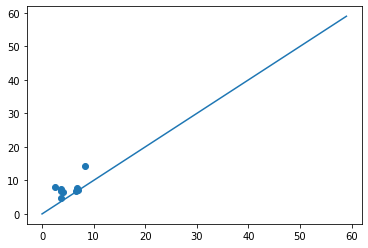

In [59]:
plt.scatter(af_ranges[1, :, 0], af_ranges[2, :, 0])
plt.plot(np.arange(0,60), np.arange(0,60))

# plt.xlim(0,20)
# plt.ylim(0,20)

In [60]:
non_af_ranges.shape

(3, 21, 6)

In [61]:
non_af_ranges[1, :, 0]

array([ 9.09990394, 23.53989182, 17.74985977, 33.9217853 ,  6.09458364,
        6.65154909, 15.55731699,  9.31294042, 14.7805203 , 12.83773888,
       19.56991758, 12.38282567, 16.17569054, 11.11781689,  8.84807029,
       12.3833412 , 37.7001088 ,  2.71413666, 37.50716566,  9.95677104,
       32.3266639 ])